In [1]:
## PYTHON LIBRARIES
# Importing libraries
import sys
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm, tqdm_notebook
#import missingno as msno
import matplotlib.gridspec
from scipy import stats
import matplotlib.patches as mpatches
# Define some general functions
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from adjustText import adjust_text
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import datetime
import statsmodels
import scikit_posthocs as sp
from scipy import stats

## WORKING DIRECTORY
path = "../analysis/plots/"
new_day = datetime.datetime.now().strftime("%Y%m%d")

palette = {"Continuous": "darkviolet", "Intermittent" : "lime", "Control":"black"}

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
dfmales = pd.read_csv("../analysis/df_males.csv")
dfmales.set_index("Unnamed: 0", inplace = True)
dffemales = pd.read_csv("../analysis/df_females.csv")
dffemales.set_index("Unnamed: 0", inplace = True)
metadatamales = pd.read_csv("../analysis/metadata_males.csv")
metadatamales.set_index("ID", inplace = True)
metadatafemales = pd.read_csv("../analysis/metadata_females.csv")
metadatafemales.set_index("ID", inplace = True)

In [5]:
mer_males = pd.merge(dfmales, metadatamales.loc[:, ["Treatment"]], 
                     left_index = True, right_index = True)
mer_females = pd.merge(dffemales, metadatafemales.loc[:, ["Treatment"]], 
                     left_index = True, right_index = True)

stats_males = pd.read_csv("../analysis/stats_males_maarouf.csv")
stats_males.set_index("Unnamed: 0", inplace = True)
stats_females = pd.read_csv("../analysis/stats_females_maarouf.csv")
stats_females.set_index("Unnamed: 0", inplace = True)

In [64]:
caca = mer_males.loc[:, ["Gcg", "Treatment"]].dropna()

(caca[caca["Treatment"] == "Intermittent"].mean())/(caca[caca["Treatment"] == "Control"].mean())

/var/folders/1d/m_275l6153b26smzn9vx6txh0000gp/T/ipykernel_17099/3886674155.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (caca[caca["Treatment"] == "Intermittent"].mean())/(caca[caca["Treatment"] == "Control"].mean())


Gcg    0.897679
dtype: float64

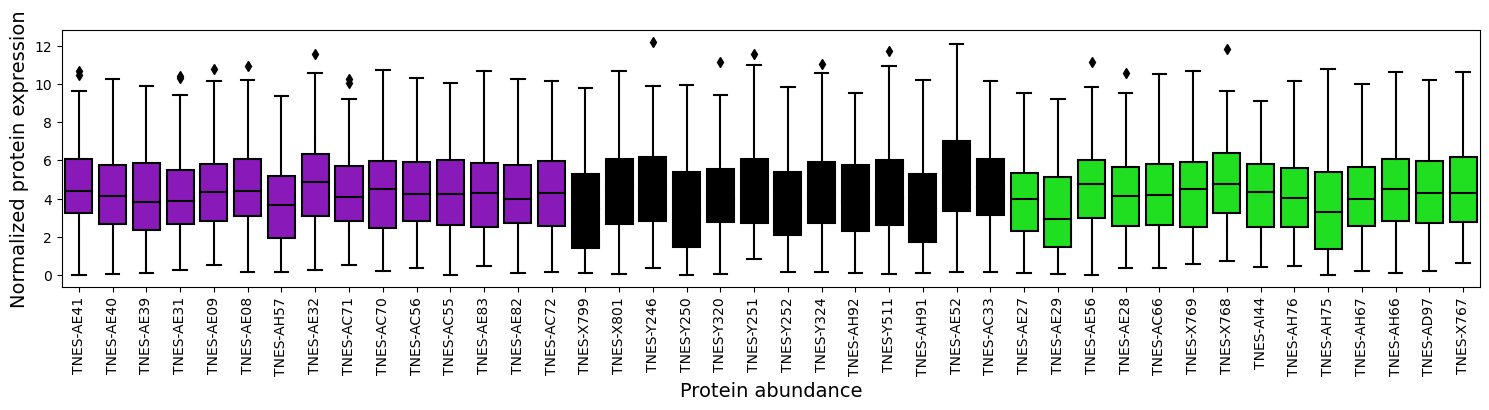

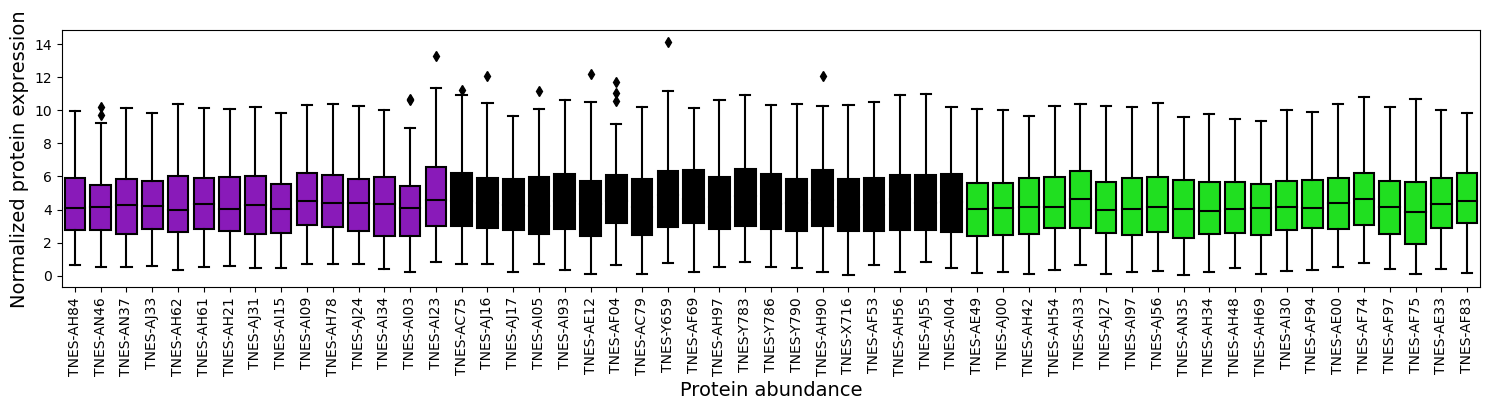

In [8]:
# Plot quality control of protein abundance
sub = mer_males.sort_values(["Treatment"])
intensities = sub.drop(columns = ["Treatment"]).T
palint = []

for e in sub["Treatment"]:
    palint.append(palette[e])
    
## Average intensities per sample
fig, ax = plt.subplots(figsize = (15, 4))
g = sns.boxplot(data = intensities, ax = ax, palette = palint)
plt.xticks(rotation = 90)
plt.xlabel("Protein abundance")
plt.ylabel("Normalized protein expression")
ax.yaxis.label.set_size(14)
ax.xaxis.label.set_size(14)

matplotlib.rcParams['pdf.fonttype'] = 42
plt.tight_layout()
plt.savefig(f"{path}/RawQC_protein_abundance_males_{new_day}.pdf")

# Plot quality control of protein abundance females
sub = mer_females.sort_values(["Treatment"])
intensities = sub.drop(columns = ["Treatment"]).T
palint = []

for e in sub["Treatment"]:
    palint.append(palette[e])
    
## Average intensities per sample females
fig, ax = plt.subplots(figsize = (15, 4))
g = sns.boxplot(data = intensities, ax = ax, palette = palint)
plt.xticks(rotation = 90)
plt.xlabel("Protein abundance")
plt.ylabel("Normalized protein expression")
ax.yaxis.label.set_size(14)
ax.xaxis.label.set_size(14)

matplotlib.rcParams['pdf.fonttype'] = 42
plt.tight_layout()
plt.savefig(f"{path}/RawQC_protein_abundance_females_{new_day}.pdf")

In [9]:
# Filter those where tukey is significant for both
stats_females = stats_females.loc[(stats_females['Tukey_Continuous']< 0.05) & 
                                  (stats_females['Tukey_Intermittent']< 0.05)]
stats_males = stats_males.loc[(stats_males['Tukey_Continuous']< 0.05) & 
                                  (stats_males['Tukey_Intermittent']< 0.05)]

In [10]:
stats_males["FoldChange_Continuous"].fillna(0.6071080448863438, inplace = True)
stats_males["FoldChange_Intermittent"].fillna(0.6663832212185449, inplace = True)

stats_females["FoldChange_Continuous"].fillna(0.7825460875727795, inplace = True)
stats_females["FoldChange_Intermittent"].fillna(0.6700797462010118, inplace = True)

In [11]:
cmap_MB = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#555555","white","#1AA7EC"])

In [12]:
stats_males

,ANOVA,Tukey_Continuous,Tukey_Intermittent,FoldChange_Continuous,FoldChange_Intermittent
Unnamed: 0,,,,,
Notch3,0.003065,0.007442,0.007305,1.070301,1.071611
Cntn1,0.000102,0.000107,0.002529,1.149025,1.116973
Gfra1,0.001638,0.003184,0.005994,0.774552,0.785809
Ccl3,0.001100,0.002082,0.004699,0.805992,0.818434
Il10,0.014263,0.015893,0.049994,0.607108,0.666383
Dctn2,0.013898,0.024108,0.030007,0.669675,0.675299
Ntf3,0.009469,0.010525,0.042850,0.852605,0.877933


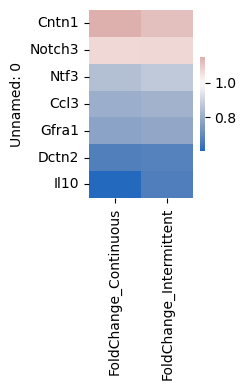

In [19]:
fig, ax = plt.subplots(figsize = (2.5,4))
sns.heatmap(stats_males.loc[:, ["FoldChange_Continuous", 
                                "FoldChange_Intermittent"]].sort_values(by = ["FoldChange_Continuous"],
                                                                       ascending = False),
                center = 1, cmap = "vlag", cbar_kws={'shrink': 0.5})
matplotlib.rcParams['pdf.fonttype'] = 42
plt.tight_layout()
plt.savefig("{}/MB_sigheatmap_males_{}.pdf".format(path, new_day))

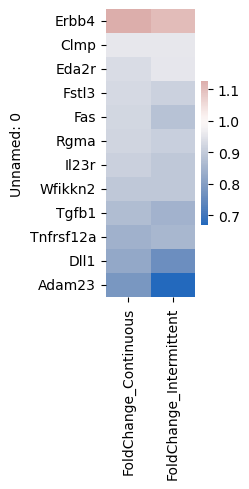

In [18]:
fig, ax = plt.subplots(figsize = (2.5,5))
sns.heatmap(stats_females.loc[:, ["FoldChange_Continuous", 
                                "FoldChange_Intermittent"]].sort_values(by = ["FoldChange_Continuous"], ascending = False),
                center = 1, cmap = "vlag", cbar_kws={'shrink': 0.5})
matplotlib.rcParams['pdf.fonttype'] = 42
plt.tight_layout()
plt.savefig("{}/MB_sigheatmap_females_{}.pdf".format(path, new_day))

In [15]:
def make_pca2(in_df, a, my_pal, wd_dir, top=100):
    b = a + 1
    cols = in_df.columns
    pca = PCA(n_components = 4)
    sorted_mean = in_df.mean(axis = 1).sort_values()
    select = sorted_mean.tail(top)
    in_df = in_df.loc[select.index.values]
    pca.fit(in_df)
    temp_df = pd.DataFrame()
    temp_df['pc_{}'.format(a+1)] = pca.components_[a]
    temp_df['pc_{}'.format(b+1)] = pca.components_[b]
    temp_df.index = cols
    
    print(pca.explained_variance_ratio_)
    temp_df['color'] = my_pal
    
    fig, ax = plt.subplots(figsize = (4,4))
    temp_df.plot(kind = 'scatter', x = 'pc_{}'.format(a+1), y = 'pc_{}'.format(b+1), s = 30, 
                 c = temp_df["color"], ax = ax, edgecolors="black")
    
    ax.set_title("PCA", size = 20)
    ax.set_xlabel("PC{}_{:.3f}%".format(a+1, pca.explained_variance_ratio_[a]*100), size = 18)
    ax.set_ylabel("PC{}_{:.3f}%".format(b+1, pca.explained_variance_ratio_[b]*100), size = 18)
    
    ax.yaxis.label.set_size(18)
    ax.xaxis.label.set_size(18)
    ax.tick_params(axis = "x", labelsize = 12)
    ax.tick_params(axis = "y", labelsize = 12)
    plt.style.context('seaborn-darkgrid')
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    matplotlib.rcParams['pdf.fonttype'] = 42
    plt.tight_layout()
    
    plt.savefig("{}/PCA_PCcomp_{}_{}.pdf".format(wd_dir, str(a + 1), new_day))

[0.85838167 0.06061554 0.01758189 0.01606044]


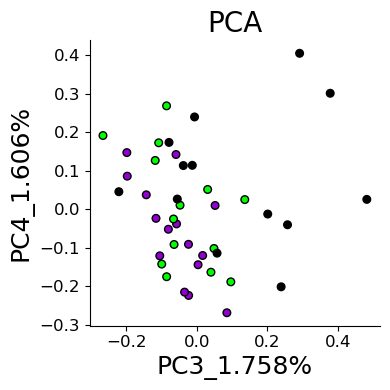

In [16]:
my_pal = []
for e in mer_males["Treatment"].to_list():
    my_pal.append(palette[e])
make_pca2(mer_males.drop(columns = ["Treatment"]).T.fillna(0), 2, my_pal, path)

Index(['Notch3', 'Cntn1', 'Gfra1', 'Ccl3', 'Il10', 'Dctn2', 'Ntf3'], dtype='object', name='Unnamed: 0')

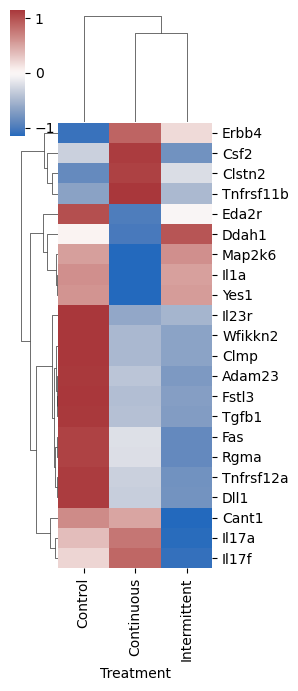

In [57]:
sub = mer_females.sort_values(["Treatment"])
sig_genes = list(stats_females[stats_females["ANOVA"] < 0.05].index)
for e in ["Il17a","Clstn2","Il17f","Cant1","Map2k6","Tnfrsf11b","Il1a","Ddah1","Yes1","Csf2", "Treatment"]:
    sig_genes.append(e)
sig_genes = list(set(sig_genes))
sub = sub.loc[:, sig_genes]

cm = sns.clustermap(sub.groupby("Treatment").median().T, figsize = (3, 7), z_score = 0,
                   cmap = "vlag")
matplotlib.rcParams['pdf.fonttype'] = 42
#plt.tight_layout()
    
cm.savefig("{}/HeatmapZscoreGene_plusIntervsConti_females_{}.pdf".format(path, new_day))

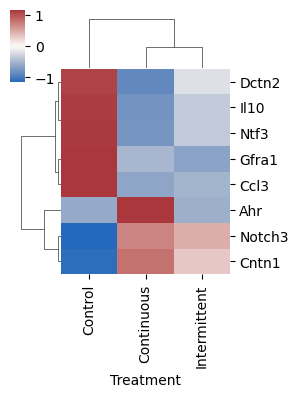

In [55]:
sub = mer_males.sort_values(["Treatment"])
sig_genes = list(stats_males[stats_males["ANOVA"] < 0.05].index)
sig_genes.append("Treatment")
sig_genes.append("Ahr")
sub = sub.loc[:, sig_genes]

cm = sns.clustermap(sub.groupby("Treatment").median().T, figsize = (3, 4), z_score = 0,
                   cmap = "vlag")
matplotlib.rcParams['pdf.fonttype'] = 42
#plt.tight_layout()
    
cm.savefig("{}/HeatmapZscoreGene_plusIntervsConti_males_{}.pdf".format(path, new_day))

In [45]:
print(sig_genes)

['Clmp', 'Tgfb1', 'Rgma', 'Adam23', 'Wfikkn2', 'Fas', 'Erbb4', 'Il23r', 'Dll1', 'Tnfrsf12a', 'Fstl3', 'Eda2r', 'Treatment']
